In [2]:
import requests as r
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Important Links
[The Movie DB](https://www.themoviedb.org/) <br>
[API Documentation](https://developers.themoviedb.org/3/getting-started/introduction)

In [2]:
API_KEY = 'db6bd34e31c99738cfb114ed7ad6d566'

# Helper Functions

# Problems
- What makes a movie good, bad? How would you define those? (Classification)
- Can we predict vote count and ratings based on certain criterias? (Regression)
- Can neural networks work on non-linearly-correlated data?
- How does it compare to linear regression?

# Data Extraction

In [3]:
def compute_top_avg(df, col, percentile):
    try:
        top = df[col].sort_values(ascending=False)[:int(len(df) * percentile), 1]
        return top.sum() / len(top)
    except:
        return np.nan

In [4]:
def get_popularity_stats(resp, col):
    result = {}
    
    try:
        data = pd.DataFrame(resp.json()[col])

        try:
            result['avg'] = compute_top_avg(data, col='popularity', percentile=0.1)
        except:
            result['avg'] = np.nan

        try:
            result['sum'] = data['popularity'].sum()
        except:
            result['sum'] = np.nan 

        try:
            result['top'] = data['popularity'].max()
        except:
            result['top'] = np.nan

    except KeyError:
        result['avg'] = np.nan
        result['sum'] = np.nan
        result['top'] = np.nan
        
    return result

In [5]:
def get_movies():
    movie = pd.DataFrame()
    resp = r.get(f"https://api.themoviedb.org/3/discover/movie?api_key={API_KEY}&language=en-US&sort_by=revenue.desc&include_adult=false&include_video=false&page=1")
    total_pages = resp.json()['total_pages']
    
    # Get relevant movie columns
    cols = ['title', 'id', 'popularity', 'vote_count', 'vote_average']
    for i in range(1,total_pages + 1):
        if (i % 50 == 0):
            print('Page', i)
        resp = r.get(f"https://api.themoviedb.org/3/discover/movie?api_key={API_KEY}&language=en-US&sort_by=revenue.desc&include_adult=false&include_video=false&page={i}")
        data = pd.DataFrame(resp.json()['results'])[cols]
        movie = movie.append(data)
    
    movie = movie.reset_index(drop=True)
        
    top_casts_popularity_avg = []
    top_crews_popularity_avg = []
    casts_popularity_sum = []
    crews_popularity_sum = []
    top_cast_popularity = []
    top_crew_popularity = []
    budgets = []
    
    for i in range(len(movie)):
        movie_id = movie['id'][i]
        if (i % 1000 == 0):
            print('Movie', i)
        
        resp = r.get(f'https://api.themoviedb.org/3/movie/{movie_id}/credits?api_key={API_KEY}&language=en-US')
        
        # Get casts popularity statistics from a movie
        casts_popularity_stats = get_popularity_stats(resp, 'cast')
        top_casts_popularity_avg.append(casts_popularity_stats['avg'])
        casts_popularity_sum.append(casts_popularity_stats['sum'])
        top_cast_popularity.append(casts_popularity_stats['top'])
        
        
        # Get crews popularity statistics from a movie
        crews_popularity_stats = get_popularity_stats(resp, 'crew')
        top_crews_popularity_avg.append(crews_popularity_stats['avg'])
        crews_popularity_sum.append(crews_popularity_stats['sum'])
        top_crew_popularity.append(crews_popularity_stats['top'])

        resp = r.get(f'https://api.themoviedb.org/3/movie/{movie_id}?api_key={API_KEY}&language=en-US')
        
        # Get budget from a movie
        try:
            budgets.append(resp.json()['budget'])
        except KeyError:
            budgets.append(np.nan)
        
    movie['top_casts_popularity_avg'] = top_casts_popularity_avg
    movie['top_crews_popularity_avg'] = top_crews_popularity_avg
    movie['casts_popularity_sum'] = casts_popularity_sum
    movie['crews_popularity_sum'] = crews_popularity_sum
    movie['top_cast_popularity'] = top_cast_popularity
    movie['top_crew_popularity'] = top_crew_popularity
    movie['budget'] = budgets

    return movie

In [10]:
df = get_movies()
df.to_csv('movie-full-dataset.csv')

Page 50
Page 100
Page 150
Page 200
Page 250
Page 300
Page 350
Page 400
Page 450
Page 500
Movie 0


<ipython-input-3-ef500f9157b3>:5: RuntimeWarning: invalid value encountered in double_scalars
  return top.sum() / len(top)


Movie 100
Movie 200
Movie 300
Movie 400
Movie 500
Movie 600
Movie 700
Movie 800
Movie 900
Movie 1000
Movie 1100
Movie 1200
Movie 1300
Movie 1400
Movie 1500
Movie 1600
Movie 1700
Movie 1800
Movie 1900
Movie 2000
Movie 2100
Movie 2200
Movie 2300
Movie 2400
Movie 2500
Movie 2600
Movie 2700
Movie 2800
Movie 2900
Movie 3000
Movie 3100
Movie 3200
Movie 3300
Movie 3400
Movie 3500
Movie 3600
Movie 3700
Movie 3800
Movie 3900
Movie 4000
Movie 4100
Movie 4200
Movie 4300
Movie 4400
Movie 4500
Movie 4600
Movie 4700
Movie 4800
Movie 4900
Movie 5000
Movie 5100
Movie 5200
Movie 5300
Movie 5400
Movie 5500
Movie 5600
Movie 5700
Movie 5800
Movie 5900
Movie 6000
Movie 6100
Movie 6200
Movie 6300
Movie 6400
Movie 6500
Movie 6600
Movie 6700
Movie 6800
Movie 6900
Movie 7000
Movie 7100
Movie 7200
Movie 7300
Movie 7400
Movie 7500
Movie 7600
Movie 7700
Movie 7800
Movie 7900
Movie 8000
Movie 8100
Movie 8200
Movie 8300
Movie 8400
Movie 8500
Movie 8600
Movie 8700
Movie 8800
Movie 8900
Movie 9000
Movie 9100
Movie 92

In [3]:
df = pd.read_csv('movie-full-dataset.csv', index_col=0)
df

,title,id,popularity,vote_count,vote_average,top_casts_popularity_avg,top_crews_popularity_avg,casts_popularity_sum,crews_popularity_sum,top_cast_popularity,top_crew_popularity,budget
0,Avengers: Endgame,299534,355.688,17650,8.3,23.870800,2.616333,656.934,505.825,49.553,7.761,356000000.0
1,Avatar,19995,109.432,23115,7.5,10.457000,1.533536,96.592,716.480,11.211,4.313,237000000.0
2,Titanic,597,141.721,18920,7.9,8.051364,2.997000,195.755,121.917,27.013,4.313,200000000.0
3,Star Wars: The Force Awakens,140607,56.282,15636,7.4,7.990222,2.575783,341.934,242.998,14.324,8.688,245000000.0
4,Avengers: Infinity War,299536,374.917,21373,8.3,26.473667,2.235121,469.885,497.096,49.553,7.761,300000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Behind the Blue Door,425722,1.620,19,5.6,1.380000,NaN,9.116,2.400,1.380,0.600,0.0
9996,Insomnia Lover,741028,0.600,0,0.0,NaN,NaN,2.653,0.600,1.453,0.600,0.0
9997,The Last Waltz,13963,10.943,155,7.7,3.424000,4.680000,32.636,26.680,7.180,7.180,0.0
9998,The Gigolo 2,378462,2.163,3,4.5,NaN,NaN,14.005,7.618,5.682,3.104,0.0


In [8]:
df.head()

,title,id,popularity,vote_count,vote_average,top_casts_popularity_avg,top_crews_popularity_avg,casts_popularity_sum,crews_popularity_sum,top_cast_popularity,top_crew_popularity,budget
0,Avengers: Endgame,299534,355.688,17650,8.3,23.870800,2.616333,656.934,505.825,49.553,7.761,356000000.0
1,Avatar,19995,109.432,23115,7.5,10.457000,1.533536,96.592,716.480,11.211,4.313,237000000.0
2,Titanic,597,141.721,18920,7.9,8.051364,2.997000,195.755,121.917,27.013,4.313,200000000.0
3,Star Wars: The Force Awakens,140607,56.282,15636,7.4,7.990222,2.575783,341.934,242.998,14.324,8.688,245000000.0
4,Avengers: Infinity War,299536,374.917,21373,8.3,26.473667,2.235121,469.885,497.096,49.553,7.761,300000000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   title                     10000 non-null  object 
 1   id                        10000 non-null  int64  
 2   popularity                10000 non-null  float64
 3   vote_count                10000 non-null  int64  
 4   vote_average              10000 non-null  float64
 5   top_casts_popularity_avg  8792 non-null   float64
 6   top_crews_popularity_avg  7824 non-null   float64
 7   casts_popularity_sum      9937 non-null   float64
 8   crews_popularity_sum      9916 non-null   float64
 9   top_cast_popularity       9937 non-null   float64
 10  top_crew_popularity       9916 non-null   float64
 11  budget                    9991 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 1015.6+ KB


# Data Cleaning

In [19]:
cleaned_df = df.dropna().drop(columns=['title', 'id', 'budget'])
cleaned_df

,popularity,vote_count,vote_average,top_casts_popularity_avg,top_crews_popularity_avg,casts_popularity_sum,crews_popularity_sum,top_cast_popularity,top_crew_popularity
0,374.029,17609,8.3,20.576400,2.252843,607.395,418.227,49.261,6.223
1,125.045,23102,7.5,9.935667,1.350804,80.955,672.786,12.756,3.603
2,80.521,18905,7.9,6.459364,2.389667,168.005,108.642,16.315,3.603
3,55.784,15628,7.4,7.449389,2.897652,314.613,222.384,14.148,9.425
4,385.144,21348,8.3,24.528167,2.051621,437.763,456.858,49.261,6.223
...,...,...,...,...,...,...,...,...,...
9988,3.002,27,7.0,2.435000,1.960000,13.615,14.326,2.435,1.960
9992,9.127,155,7.7,3.264000,3.429000,31.666,22.326,5.667,5.667
9994,15.953,589,7.0,4.084500,1.560000,21.221,19.468,6.019,1.560
9996,37.724,369,6.0,10.332000,1.485182,34.770,81.946,10.332,2.155


In [28]:
cleaned_df = cleaned_df[[x for x in cleaned_df.columns if x not in ['vote_count', 'vote_average']] + ['vote_count', 'vote_average']]
cleaned_df.to_csv('movie-dataset.csv')

In [10]:
cleaned_df = pd.read_csv('cleaned-movie-dataset.csv', index_col=0)
cleaned_df

,popularity,top_casts_popularity_avg,top_crews_popularity_avg,casts_popularity_sum,crews_popularity_sum,top_cast_popularity,top_crew_popularity,vote_count,vote_average
0,374.029,20.576400,2.252843,607.395,418.227,49.261,6.223,17609,8.3
1,125.045,9.935667,1.350804,80.955,672.786,12.756,3.603,23102,7.5
2,80.521,6.459364,2.389667,168.005,108.642,16.315,3.603,18905,7.9
3,55.784,7.449389,2.897652,314.613,222.384,14.148,9.425,15628,7.4
4,385.144,24.528167,2.051621,437.763,456.858,49.261,6.223,21348,8.3
...,...,...,...,...,...,...,...,...,...
9988,3.002,2.435000,1.960000,13.615,14.326,2.435,1.960,27,7.0
9992,9.127,3.264000,3.429000,31.666,22.326,5.667,5.667,155,7.7
9994,15.953,4.084500,1.560000,21.221,19.468,6.019,1.560,589,7.0
9996,37.724,10.332000,1.485182,34.770,81.946,10.332,2.155,369,6.0


We can see that the data are skewed and normal.

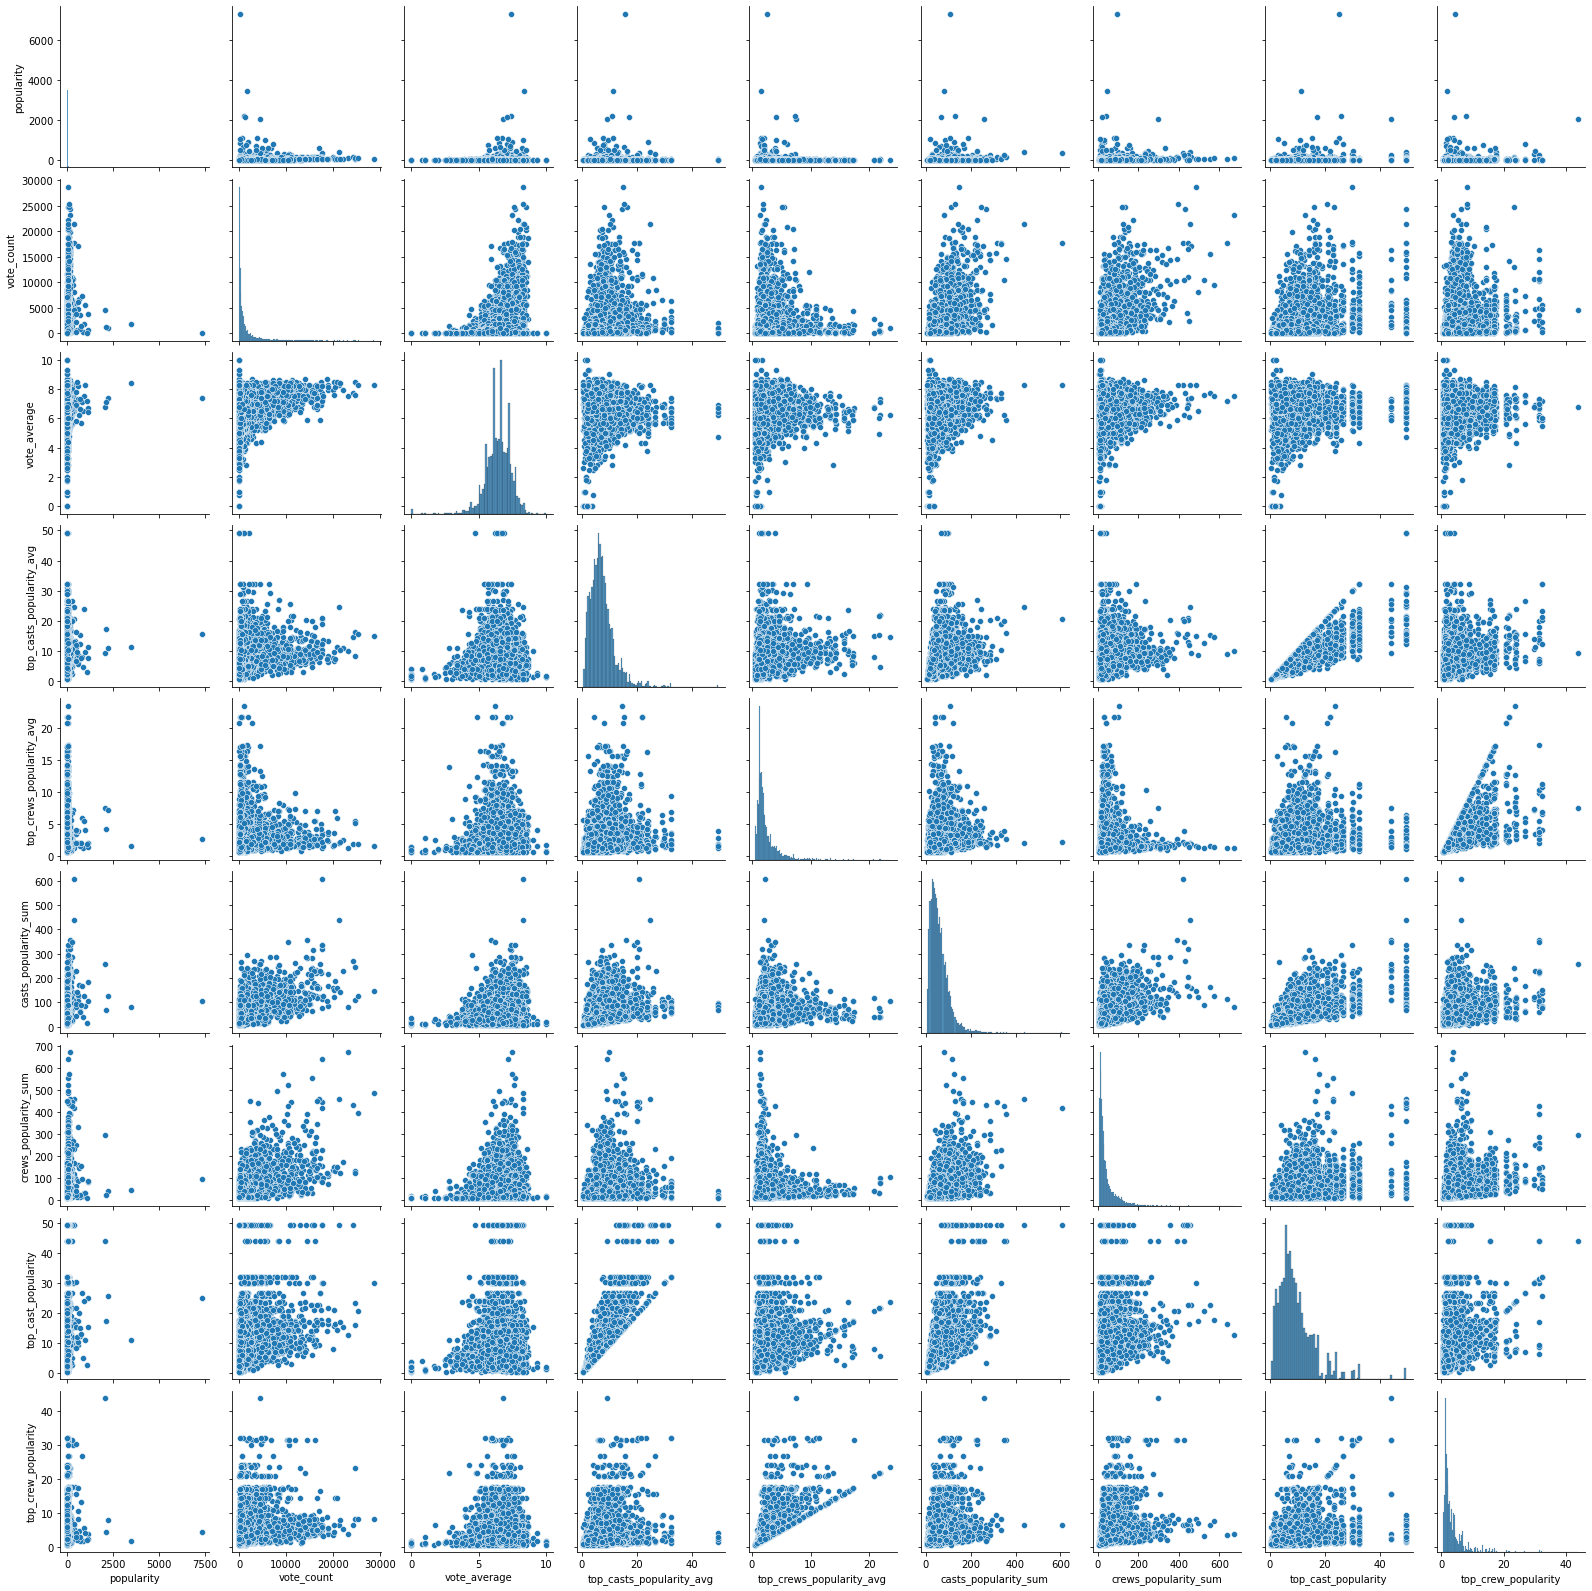

In [20]:
sb.pairplot(cleaned_df)

In [41]:
X = cleaned_df.iloc[:, :-2]
Y = cleaned_df.iloc[:, -2:]

Maybe we should split the dataset into 3
1. Training set (60%)
2. Validation set (20%)
3. Testing set (20%)

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

<AxesSubplot:xlabel='vote_average', ylabel='Count'>

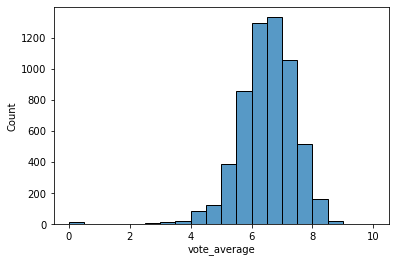

In [53]:
sb.histplot(data=Y_train['vote_average'], binwidth=0.5)

<AxesSubplot:xlabel='vote_count', ylabel='Count'>

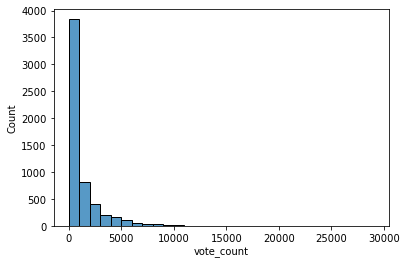

In [63]:
sb.histplot(data=Y_train['vote_count'], binwidth=1000)


In [64]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
X_test

array([[-0.14329347, -0.57232721, -0.6018916 , ..., -0.68932827,
        -0.70654619, -0.64273676],
       [-0.03539961, -0.8813623 , -0.38612739, ..., -0.22481936,
        -0.90498792, -0.52538829],
       [ 0.00972186, -0.33026496, -0.06917721, ..., -0.42995222,
        -0.27443639, -0.2580496 ],
       ...,
       [-0.12171469,  3.09243583, -0.68075713, ..., -0.65288424,
         1.64672026, -0.68562965],
       [-0.06408744, -0.07283096,  1.9475981 , ..., -0.1352532 ,
        -0.14806189,  0.74386353],
       [-0.09210982, -0.71175872, -0.24352461, ..., -0.04954189,
        -0.54245015, -0.28313789]])

In [70]:
model = Sequential()

# Hidden Layers
model.add(Dense(units=32, activation='relu', input_dim=7))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=32, activation='relu'))

# Output Layer
model.add(Dense(units=2))

# Consideration
- Use Huber loss function that is less sensitive to outliers in data than the squared error loss <br>
    [Which loss functions to choose?](https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0)
- Try other loss functions
- Use metrics
- Overfit first, then regularize the model

In [72]:
# Compile
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit
model.fit(X_train, Y_train, batch_size=10, epochs=50)

Epoch 1/50
591/591 [==============================] - 1s 1ms/step - loss: 1680139.2380
Epoch 2/50
591/591 [==============================] - 1s 1ms/step - loss: 1732300.3379
Epoch 3/50
591/591 [==============================] - 1s 1ms/step - loss: 1757940.4179
Epoch 4/50
591/591 [==============================] - 1s 1ms/step - loss: 1712288.7207
Epoch 5/50
591/591 [==============================] - 1s 1ms/step - loss: 1832815.1759
Epoch 6/50
591/591 [==============================] - 1s 1ms/step - loss: 1704660.0169
Epoch 7/50
591/591 [==============================] - 1s 1ms/step - loss: 1676733.2349
Epoch 8/50
591/591 [==============================] - 1s 1ms/step - loss: 1859629.3528
Epoch 9/50
591/591 [==============================] - 1s 1ms/step - loss: 1618061.4280
Epoch 10/50
591/591 [==============================] - 1s 1ms/step - loss: 1788004.9019
Epoch 11/50
591/591 [==============================] - 1s 1ms/step - loss: 1658060.2486
Epoch 12/50
591/591 [====================

In [73]:
Y_pred = model.predict(X_test)

In [74]:
Y_pred

array([[ 152.4308  ,    6.087101],
       [1033.486   ,    6.650053],
       [1557.05    ,    6.36617 ],
       ...,
       [ 238.30453 ,    5.040716],
       [2213.1702  ,    6.440256],
       [ 727.357   ,    6.618931]], dtype=float32)

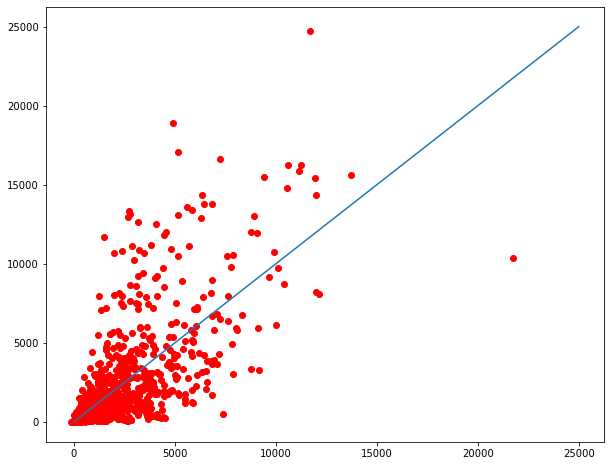

In [80]:
plt.figure(figsize=(10, 8))

plt.scatter(Y_pred[:, 0], Y_test.iloc[:, 0], color='red')
plt.plot([0, 25000], [0, 25000])

From here, we should do something with the output layer to make sure that it falls in the range [0, 10]

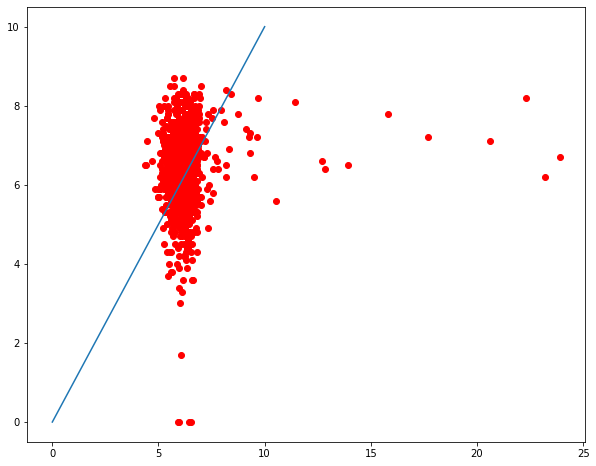

In [82]:
plt.figure(figsize=(10, 8))

plt.scatter(Y_pred[:, 1], Y_test.iloc[:, 1], color='red')
plt.plot([0, 10], [0, 10])

In [85]:
model.save('first-model')

INFO:tensorflow:Assets written to: first-model/assets


In [86]:
from tensorflow import keras

In [88]:
loaded_model = keras.models.load_model('first-model')
loaded_model.predict(X_test)

array([[ 152.4308  ,    6.087101],
       [1033.486   ,    6.650053],
       [1557.05    ,    6.36617 ],
       ...,
       [ 238.30453 ,    5.040716],
       [2213.1702  ,    6.440256],
       [ 727.357   ,    6.618931]], dtype=float32)

## Classification Model

In [12]:
class_df = cleaned_df
class_df

,popularity,top_casts_popularity_avg,top_crews_popularity_avg,casts_popularity_sum,crews_popularity_sum,top_cast_popularity,top_crew_popularity,vote_count,vote_average
0,374.029,20.576400,2.252843,607.395,418.227,49.261,6.223,17609,8.3
1,125.045,9.935667,1.350804,80.955,672.786,12.756,3.603,23102,7.5
2,80.521,6.459364,2.389667,168.005,108.642,16.315,3.603,18905,7.9
3,55.784,7.449389,2.897652,314.613,222.384,14.148,9.425,15628,7.4
4,385.144,24.528167,2.051621,437.763,456.858,49.261,6.223,21348,8.3
...,...,...,...,...,...,...,...,...,...
9988,3.002,2.435000,1.960000,13.615,14.326,2.435,1.960,27,7.0
9992,9.127,3.264000,3.429000,31.666,22.326,5.667,5.667,155,7.7
9994,15.953,4.084500,1.560000,21.221,19.468,6.019,1.560,589,7.0
9996,37.724,10.332000,1.485182,34.770,81.946,10.332,2.155,369,6.0


In [24]:
class_df['quality'] = ((class_df[['vote_average']] >= 7).astype(int)).astype('category')
class_df = class_df.drop(columns=['vote_count', 'vote_average'])
class_df

KeyError: "None of [Index(['vote_average'], dtype='object')] are in the [columns]"

In [26]:
class_df[['quality']].value_counts()

quality
0          5180
1          2205
dtype: int64

In [27]:
class_df

,popularity,top_casts_popularity_avg,top_crews_popularity_avg,casts_popularity_sum,crews_popularity_sum,top_cast_popularity,top_crew_popularity,quality
0,374.029,20.576400,2.252843,607.395,418.227,49.261,6.223,1
1,125.045,9.935667,1.350804,80.955,672.786,12.756,3.603,1
2,80.521,6.459364,2.389667,168.005,108.642,16.315,3.603,1
3,55.784,7.449389,2.897652,314.613,222.384,14.148,9.425,1
4,385.144,24.528167,2.051621,437.763,456.858,49.261,6.223,1
...,...,...,...,...,...,...,...,...
9988,3.002,2.435000,1.960000,13.615,14.326,2.435,1.960,1
9992,9.127,3.264000,3.429000,31.666,22.326,5.667,5.667,1
9994,15.953,4.084500,1.560000,21.221,19.468,6.019,1.560,1
9996,37.724,10.332000,1.485182,34.770,81.946,10.332,2.155,0


In [30]:
X = class_df.iloc[:, :-1]
y = class_df.iloc[:, -1]

In [33]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
train, validate, test = np.split(class_df.sample(frac=1), [int(.6*len(class_df)), int(.8*len(class_df))])

In [35]:
X_train, y_train = train.iloc[:, :-1], train.iloc[:, -1]
X_val, y_val = validate.iloc[:, :-1], validate.iloc[:, -1]
X_test, y_test = test.iloc[:, :-1], test.iloc[:, -1]

In [43]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4431 entries, 690 to 5059
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   popularity                4431 non-null   float64
 1   top_casts_popularity_avg  4431 non-null   float64
 2   top_crews_popularity_avg  4431 non-null   float64
 3   casts_popularity_sum      4431 non-null   float64
 4   crews_popularity_sum      4431 non-null   float64
 5   top_cast_popularity       4431 non-null   float64
 6   top_crew_popularity       4431 non-null   float64
dtypes: float64(7)
memory usage: 436.9 KB


/home/nicklimmm/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

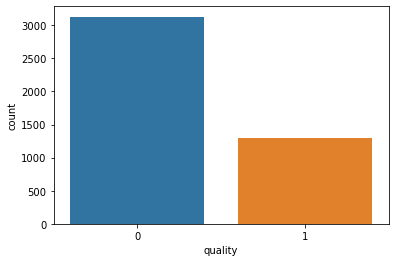

In [39]:
sb.countplot(y_train)

In [31]:
# First Class Model

model = Sequential()
model.add(Dense(32, input_dim=7, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [32]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
444/444 [==============================] - 1s 2ms/step - loss: 0.7506 - accuracy: 0.6814
Epoch 2/150
444/444 [==============================] - 1s 1ms/step - loss: 0.6194 - accuracy: 0.6947
Epoch 3/150
444/444 [==============================] - 1s 1ms/step - loss: 0.6111 - accuracy: 0.7115
Epoch 4/150
444/444 [==============================] - 1s 1ms/step - loss: 0.5870 - accuracy: 0.7120
Epoch 5/150
444/444 [==============================] - 1s 1ms/step - loss: 0.5891 - accuracy: 0.7084
Epoch 6/150
444/444 [==============================] - 1s 1ms/step - loss: 0.5893 - accuracy: 0.7144
Epoch 7/150
444/444 [==============================] - 1s 1ms/step - loss: 0.5792 - accuracy: 0.7122
Epoch 8/150
444/444 [==============================] - 1s 1ms/step - loss: 0.5750 - accuracy: 0.7260
Epoch 9/150
444/444 [==============================] - 1s 1ms/step - loss: 0.5782 - accuracy: 0.7117
Epoch 10/150
444/444 [==============================] - 1s 1ms/step - loss: 0.5901 - accura

In [42]:
_, accuracy = model.evaluate(X_val, y_val)

47/47 [==============================] - 0s 1ms/step - loss: 0.5992 - accuracy: 0.7123


In [44]:
# Second Class Model

model = Sequential()
model.add(Dense(32, input_dim=7, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [45]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
444/444 [==============================] - 1s 1ms/step - loss: 0.6208 - accuracy: 0.7071
Epoch 2/150
444/444 [==============================] - 1s 1ms/step - loss: 0.6036 - accuracy: 0.7055
Epoch 3/150
444/444 [==============================] - 1s 1ms/step - loss: 0.5959 - accuracy: 0.7068
Epoch 4/150
444/444 [==============================] - 1s 1ms/step - loss: 0.5922 - accuracy: 0.7068
Epoch 5/150
444/444 [==============================] - 1s 1ms/step - loss: 0.5899 - accuracy: 0.7071
Epoch 6/150
444/444 [==============================] - 1s 1ms/step - loss: 0.5876 - accuracy: 0.7071
Epoch 7/150
444/444 [==============================] - 1s 1ms/step - loss: 0.5872 - accuracy: 0.7057
Epoch 8/150
444/444 [==============================] - 1s 1ms/step - loss: 0.5909 - accuracy: 0.7066
Epoch 9/150
444/444 [==============================] - 1s 1ms/step - loss: 0.5874 - accuracy: 0.7082
Epoch 10/150
444/444 [==============================] - 1s 1ms/step - loss: 0.5843 - accura

In [48]:
_, accuracy = model.evaluate(X_val, y_val)

47/47 [==============================] - 0s 924us/step - loss: 0.6222 - accuracy: 0.7217


Overfits

In [49]:
# Third Class Model

model = Sequential()
model.add(Dense(64, input_dim=7, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [50]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
model.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
444/444 [==============================] - 1s 2ms/step - loss: 0.6994 - accuracy: 0.6684
Epoch 2/100
444/444 [==============================] - 1s 1ms/step - loss: 0.6053 - accuracy: 0.7063
Epoch 3/100
444/444 [==============================] - 1s 2ms/step - loss: 0.6322 - accuracy: 0.6937
Epoch 4/100
444/444 [==============================] - 1s 2ms/step - loss: 0.5940 - accuracy: 0.7060
Epoch 5/100
444/444 [==============================] - 1s 2ms/step - loss: 0.6073 - accuracy: 0.6959
Epoch 6/100
444/444 [==============================] - 1s 2ms/step - loss: 0.5953 - accuracy: 0.6980
Epoch 7/100
444/444 [==============================] - 1s 2ms/step - loss: 0.5889 - accuracy: 0.7061
Epoch 8/100
444/444 [==============================] - 1s 2ms/step - loss: 0.5925 - accuracy: 0.7036
Epoch 9/100
444/444 [==============================] - 1s 2ms/step - loss: 0.5777 - accuracy: 0.7127
Epoch 10/100
444/444 [==============================] - 1s 2ms/step - loss: 0.5897 - accura

In [52]:
_, accuracy = model.evaluate(X_val, y_val)

47/47 [==============================] - 0s 2ms/step - loss: 0.6621 - accuracy: 0.6960
